In [ ]:
import tensorflow as tf

In [ ]:
# Load the data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
#Normalizing
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
print("x_train.shape:", x_train.shape)
print("x_test.shape:", x_test.shape)

x_train.shape: (60000, 28, 28)
x_test.shape: (10000, 28, 28)


In [ ]:
# Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 0.2893 - accuracy: 0.9168 - val_loss: 0.1412 - val_accuracy: 0.9582
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1432 - accuracy: 0.9578 - val_loss: 0.1003 - val_accuracy: 0.9688
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1073 - accuracy: 0.9676 - val_loss: 0.0847 - val_accuracy: 0.9739
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0870 - accuracy: 0.9728 - val_loss: 0.0788 - val_accuracy: 0.9761
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0746 - accuracy: 0.9763 - val_loss: 0.0731 - val_accuracy: 0.9768
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0654 - accuracy: 0.9793 - val_loss: 0.0728 - val_accuracy: 0.9781
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0582 - accuracy: 0.9813 - val_loss: 0.0718 - val_accuracy:

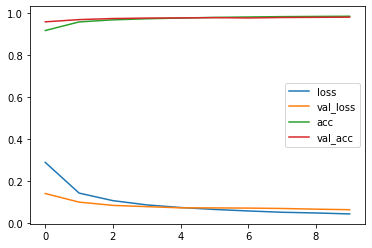

In [ ]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [ ]:
# Evaluate the model
print(model.evaluate(x_test, y_test))

#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)
print("               Predicted Label")
print(cm)

313/313 [==============================] - 1s 4ms/step - loss: 0.0642 - accuracy: 0.9804
[0.06418219208717346, 0.980400025844574]
               Predicted Label
[[ 970    1    1    0    0    0    4    2    2    0]
 [   0 1126    2    2    0    0    2    0    3    0]
 [   6    1 1009    1    3    0    2    4    6    0]
 [   0    0    2  991    0    5    0    6    2    4]
 [   1    0    3    0  967    0    2    0    1    8]
 [   2    0    0    8    2  872    5    1    2    0]
 [   6    3    0    1    5    4  938    0    1    0]
 [   1    4   12    2    1    0    0 1002    1    5]
 [   6    0    2    5    3    1    3    6  944    4]
 [   1    3    0    4    8    1    0    6    1  985]]


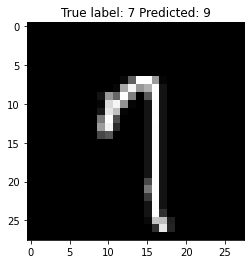

In [ ]:
# Show some misclassified examples
import numpy as np
misclassified_idx = np.where(y_pred != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], y_pred[i]));